# Project Overview

This project is a redo of what I did for General Assembly. I believe now that I have worked hard at coding and done many other projects, then I can vastly improve the previous project. The dataset is a documentation of property sales in Brooklyn, NY from 2003-2017. It can be found on Kaggle https://www.kaggle.com/tianhwu/brooklynhomes2003to2017. The target variable that I want to predict is the sale price of the properties. 

# Importing Basic Libraries

In [1]:
#These are the libraries I typically use in my analysis so I find it easier to import them all at once
#If I need more libraries I will import them as needed

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

# Initial Review of the Data

In [2]:
#Reading in of the dataset

brooklyn = pd.read_csv("brooklyn_sales_map.csv")

C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (40,41,43,45,46,47,86) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#The beginning structure of this dataset contains 390,883 rows and 111 columns worth of data

brooklyn.shape

(390883, 111)

In [4]:
#Here I am checking what the data types are for my potential explanatory variables
#Looks like most of them are numeric (integers or floats)
#There are definitely a few strings though that may have to be converted to dummy variables

brooklyn.dtypes

Unnamed: 0                   int64
borough                      int64
neighborhood                object
building_class_category     object
tax_class                   object
block                        int64
lot                          int64
easement                   float64
building_class              object
address                     object
apartment_number            object
zip_code                     int64
residential_units            int64
commercial_units             int64
total_units                  int64
land_sqft                  float64
gross_sqft                 float64
year_built                   int64
tax_class_at_sale            int64
building_class_at_sale      object
sale_price                 float64
sale_date                   object
year_of_sale                 int64
Borough                     object
CD                         float64
CT2010                     float64
CB2010                     float64
SchoolDist                 float64
Council             

In [5]:
#A brief look at the beginning of the dataset

brooklyn.head()

,Unnamed: 0,borough,neighborhood,building_class_category,tax_class,block,lot,easement,building_class,address,...,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLA,PFIRM15_FL,Version,MAPPLUTO_F,SHAPE_Leng,SHAPE_Area
0,1,3,DOWNTOWN-METROTECH,28 COMMERCIAL CONDOS,4,140,1001,NaN,R5,330 JAY STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3,DOWNTOWN-FULTON FERRY,29 COMMERCIAL GARAGES,4,54,1,NaN,G7,85 JAY STREET,...,NaN,3.000540e+09,12/06/2002,1.0,NaN,NaN,17V1.1,0.0,1559.889144,140131.577176
2,3,3,BROOKLYN HEIGHTS,21 OFFICE BUILDINGS,4,204,1,NaN,O6,29 COLUMBIA HEIGHTS,...,NaN,0.000000e+00,NaN,1.0,NaN,NaN,17V1.1,0.0,890.718521,34656.447240
3,4,3,MILL BASIN,22 STORE BUILDINGS,4,8470,55,NaN,K6,5120 AVENUE U,...,NaN,0.000000e+00,NaN,1.0,1.0,1.0,17V1.1,0.0,3729.786857,797554.847834
4,5,3,BROOKLYN HEIGHTS,26 OTHER HOTELS,4,230,1,NaN,H8,21 CLARK STREET,...,NaN,0.000000e+00,NaN,1.0,NaN,NaN,17V1.1,0.0,620.761169,21360.147631


In [6]:
#A brief look at the end of the dataset

brooklyn.tail()

,Unnamed: 0,borough,neighborhood,building_class_category,tax_class,block,lot,easement,building_class,address,...,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLA,PFIRM15_FL,Version,MAPPLUTO_F,SHAPE_Leng,SHAPE_Area
390878,390879,3,WYCKOFF HEIGHTS,31 COMMERCIAL VACANT LAND,1,3337,19,NaN,C0,364 LINDEN STREET,...,NaN,0.0,NaN,1.0,NaN,NaN,17V1.1,0.0,244.422014,2501.088819
390879,390880,3,WYCKOFF HEIGHTS,31 COMMERCIAL VACANT LAND,1,3337,19,NaN,C0,364 LINDEN STREET,...,NaN,0.0,NaN,1.0,NaN,NaN,17V1.1,0.0,244.422014,2501.088819
390880,390881,3,WYCKOFF HEIGHTS,41 TAX CLASS 4 - OTHER,4,3280,50,NaN,Z9,383 HARMAN STREET,...,NaN,0.0,NaN,1.0,NaN,NaN,17V1.1,0.0,231.409296,2795.673780
390881,390882,3,3004,04 TAX CLASS 1 CONDOS,NaN,6886,1107,NaN,NaN,14 BAY 47TH STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
390882,390883,3,3004,04 TAX CLASS 1 CONDOS,NaN,6886,1109,NaN,NaN,14 BAY 47 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Here I am just dropping the first column of "unnamed" since it has no use 

brooklyn = brooklyn.drop(brooklyn.columns[0], axis=1)

In [8]:
#There are so many columns in this dataset that even trying to look at them as a whole seems inefficient

brooklyn.columns

Index(['borough', 'neighborhood', 'building_class_category', 'tax_class',
       'block', 'lot', 'easement', 'building_class', 'address',
       'apartment_number',
       ...
       'EDesigNum', 'APPBBL', 'APPDate', 'PLUTOMapID', 'FIRM07_FLA',
       'PFIRM15_FL', 'Version', 'MAPPLUTO_F', 'SHAPE_Leng', 'SHAPE_Area'],
      dtype='object', length=110)

#### Various Defintions for Non-Obvious Columns

1. 'AreaSource' A code indicating the source file that was used to determine the tax lot's TOTAL BUILDING FLOOR AREA (BldgArea)

2. 'Easements', 'easement' we delete both. The number of easements on the tax lot. As this is not important for most of the sales.

3. 'OwnerType' A code indicating type of ownership for the tax lot

4. 'building_class_category' same as 'building_class'

5. 'CT2010' The 2010 census tract that the tax lot is located in. 

6. 'CB2010' The 2010 census block that the tax lot is located in. 

7. 'ZoneDist1' The zoning district classification of the tax lot, ZONING DISTRICT 1 represents the zoning district classification occupying the greatest percentage of the tax lot’s area.

8. 'ZoneDist2' If the tax lot is divided by zoning boundary lines,Zoning, ZONING DISTRICT 2 represents the zoning classification occupying the second greatest percentage of the tax lot's area.

9. 'ZoneDist3'If the tax lot is divided by zoning boundary lines, ZONING, ZONING DISTRICT 3 represents the zoning classification occupying the third greatest percentage of the tax lot's area. 

10. 'ZoneDist4' If the tax lot is divided by zoning boundary lines, Zoning, ZONING DISTRICT 4 represents the zoning classification occupying the fourth greatest percentage of the tax lot's area.

11. 'Overlay1' The commercial overlay assigned to the tax lot. 'Overlay2' A commercial overlay associated with the tax lot.

12. 'SPDist1' The special purpose district assigned to the tax lot.SPECIAL PURPOSE DISTRICT 1 represents the special purpose district occupying the greatest percentage of the lot area.

13.  'SPDist2' SPECIAL PURPOSE DISTRICT 2 represents the special purpose district occupying the second greatest percentage of the lot area.

14. 'SPDist3' SPECIAL PURPOSE DISTRICT 3 represents the special purpose district occupying the smallest percentage of the lot area.

15. 'LtdHeight' Limited height districts are coded using the three to five character district symbols

16. 'BoroCode' same as 'Borough'

17. 'BBL' A concatenation of the borough code, tax block and tax lot.

18. 'Tract2010' The 2010 census tract that the tax lot is located in.

19. 'ZoneMap' The Department of City Planning Zoning Map Number associated with the tax lot’s X and Y Coordinates.

20. 'ZMCode' A code (Y) identifies a border Tax Lot, i.e., a Tax Lot on the border of two or more Zoning Maps

21. 'Sanborn' The Sanborn Map Company map number associated with the tax block and lot.

22. 'TaxMap' The Department of Finance paper tax map Volume Number associated with the tax block and lot.

23. 'EDesigNum' The E-Designation number assigned to the tax lot.

24. 'PLUTOMapID' A code indicating whether the tax lot is in the PLUTO file and/or the modified DTM and/or the modified DTM Clipped to the Shoreline File.

25. 'FIRM07_FLA' A one character field. Code of 1 means that some portion of the tax lot falls within the 1% annual chance floodplain as determined by FEMA’s 2007 Flood Insurance Rate Map.

26. 'PFIRM15_FL' A one character field. Code of 1 means that some portion of the tax lot falls within the 1% annual chance floodplain as determined by FEMA’s 2015 Preliminary Flood Insurance Rate Map.

27. 'Version' The Version Number related to the release of PLUTO.

28. 'MAPPLUTO_F' No description found.

29. 'APPBBL' The originating Borough, Tax Block and Tax Lot from the apportionment prior to the merge, split or property’s conversion to a condominium. The Apportionment BBL is only available for mergers, splits and conversions since 1984.

20. 'APPDate' The date of the Apportionment.

21. 'SHAPE_Leng', 'SHAPE_Area no description of both

22. 'CD' The community district (CD) or joint interest area (JIA) that the tax lot is located in, or partially located in.

23. 'SanitBoro' The Boro of the Sanitation District that services the tax lot.

24. 'SanitDistr' The Sanitation District that services the tax lot.

25. 'FireComp' The fire company that services the tax lot.

26. 'SanitSub' The Subsection of the Sanitation District that services the tax lot.

#### Dropping Irrelevant Columns

Dropping irrelevant columns will make my analysis much simpler. I had done this on the first project, but now knowing the definitions of all of the columns is making this easier

In [9]:
#I am dropping CT2010 because the census tract for the tax lot location is not important
#I am dropping CB2010 because the census block for the tax lot location is not important
#I am dropping BBL because it includes borough, tax block and tax lot. It's sort of nonsensical
#I am dropping Tract2010 since it's the same idea as CT2010
#I am dropping ZMCode, XCoord, and YCoord since those are all included in ZoneMap
#I am dropping EDesigNum since we already have the tax lot
#I am dropping PLUTOMapID since that's not important
#I am dropping FIRM07_FLA and PFIRM15_FL because flooding in Brooklyn is rare. This isn't Florida or New Orleans
#I am dropping Version since it's not important
#I am dropping MAPPLUTO_F since there's no description
#I am dropping APPBBL since everything is in Brooklyn, there's no differing boroughs
#I am dropping APPDate since that's not important
#I am dropping SHAPE_Leng and SHAPE_Area since there's no description for either
#I am dropping CD since we already have tax lot
#I am dropping address since that's the value. Address would only matter if we looked at a time series of that address
#I am dropping CondoNo since that's not important
#I am dropping apartment_number since that's not important
#I am dropping Ext because the extension code is not important
#I am dropping both Borough and borough because it's all the same borugh (Brooklyn duh)
#I am dropping BoroCode since it's all the same borough
#I am dropping Sanborn since it's not important
#I am droppng BldgClass since it's the same as building_class
#I am dropping lot and block because those are both included in TaxMap
#I am dropping building_class_category because it's the same as building class
#I am dropping building_class since we have building class at sale and that seems more important
#I am dropping tax_class since we have tax class at sale and that seems more important
#I am dropping 'BuiltFAR', 'ResidFAR', 'CommFAR', and 'FaciLFAR' since they all have to do with MAPPLUTO
#I am dropping neighborhood since that's getting too granular. Zip code would be better
#I am dropping PolicPrct, Council, SchooolDist and FireComp because those should be encoded with zip code
#The goal is to make this model clear and not needlessly complex




brooklyn = brooklyn.drop(['CT2010', 'CB2010', 'BBL', 'Tract2010', 'ZMCode', 'XCoord', 'YCoord',
                         'EDesigNum', 'PLUTOMapID', 'FIRM07_FLA', 'PFIRM15_FL', 'Version', 'MAPPLUTO_F',
                         'APPBBL', 'APPDate', 'SHAPE_Leng', 'SHAPE_Area', 'CD', 'CondoNo', 'address',
                         'apartment_number', 'Ext', 'Borough', 'borough', 'BoroCode', 'Sanborn', 'BldgClass',
                         'lot', 'block', 'building_class_category', 'building_class', 'tax_class',
                         'BuiltFAR', 'ResidFAR', 'CommFAR', 'FacilFAR', 'neighborhood', 'FireComp',
                         'PolicePrct', 'Council', 'SchoolDist'], axis = 'columns')

In [10]:
#Here I am looking at basic summary statistics for the numeric columns
#There are still so many columns that it's hard to get a macro sense of what's going on
#However, things like zip code and year built aren't really numeric, they should be converted
#Also, the average sale price looks very high, and the minimum sale price is 0 which seems suspicious

brooklyn.describe()

,easement,zip_code,residential_units,commercial_units,total_units,land_sqft,gross_sqft,year_built,tax_class_at_sale,sale_price,...,LotType,BsmtCode,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,YearAlter1,YearAlter2,TaxMap
count,0.0,390883.000000,390883.000000,390883.000000,390883.000000,3.908830e+05,3.908830e+05,390883.000000,390883.000000,3.908830e+05,...,303706.000000,303706.000000,3.037280e+05,3.037280e+05,3.037280e+05,3.037280e+05,303728.000000,303728.000000,303728.000000,303710.000000
mean,NaN,11208.429087,2.486138,0.174142,2.673227,2.368464e+03,2.970877e+03,1701.666307,1.642660,5.067545e+05,...,4.742886,2.439326,1.209784e+05,7.813468e+05,4.136623e+04,8.105911e+04,1879.716700,295.778483,34.019662,31396.728152
std,NaN,361.207836,48.200178,1.653362,48.233343,2.509129e+04,1.453960e+04,636.764362,0.906378,2.353965e+06,...,0.701608,1.559428,7.152424e+05,3.227031e+06,2.495788e+05,1.524291e+06,317.759012,710.334178,259.086380,754.905314
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000e+00,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,3.000000
25%,NaN,11209.000000,1.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,1905.000000,1.000000,0.000000e+00,...,5.000000,1.000000,6.137000e+03,2.329600e+04,0.000000e+00,0.000000e+00,1910.000000,0.000000,0.000000,30611.000000
50%,NaN,11219.000000,1.000000,0.000000,1.000000,1.900000e+03,1.820000e+03,1925.000000,1.000000,2.750000e+05,...,5.000000,2.000000,9.900000e+03,3.438000e+04,0.000000e+00,0.000000e+00,1926.000000,0.000000,0.000000,31506.000000
75%,NaN,11230.000000,2.000000,0.000000,2.000000,2.500000e+03,3.000000e+03,1954.000000,2.000000,5.930000e+05,...,5.000000,4.000000,2.275100e+04,9.553500e+04,1.550000e+03,1.550000e+03,1945.000000,0.000000,0.000000,32005.000000
max,NaN,33803.000000,20811.000000,355.000000,20811.000000,7.446955e+06,2.548000e+06,2017.000000,4.000000,4.994012e+08,...,9.000000,5.000000,6.113954e+07,5.464840e+08,6.113954e+07,5.464840e+08,2017.000000,2017.000000,2017.000000,32605.000000


In [11]:
#Here I am looking at basic summary statistics for the non-numeric columns
#There's not much I can glean from this. There's too much noise

brooklyn.describe(include='object')

,building_class_at_sale,sale_date,SanitSub,Address,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,Overlay1,Overlay2,...,SPDist2,SPDist3,LtdHeight,SplitZone,OwnerType,OwnerName,IrrLotCode,HistDist,Landmark,ZoneMap
count,390883,390883,302952,303705,303714,15115,186,3,41921,48,...,24,4,5121,303706,53494,303624,303706,19674,126,303728
unique,187,5377,33,151112,78,58,11,2,9,7,...,2,1,1,2,5,138728,2,35,55,32
top,C0,2006-08-31,2B,175 ADAMS STREET,R6,R5,R4,M1-4,C2-4,C2-2,...,EC-5,EC-6,LH-1,N,P,CLINTON HILL APARTMEN,N,Brooklyn Heights Historic District,PUBLIC SCHOOL 9 ANNEX,17a
freq,38691,1133,17504,692,62851,2468,94,2,13805,26,...,16,4,5121,288557,52318,758,252341,3974,12,32613


#### Checking for Duplicate Columns

When I did this project the first time around, there were several duplicate columns in the csv file. I re-downloaded the file from Kaggle and it looks like it was cleaned up since it was first posted. There are no longer strict duplicate columns in the file. There certainly can still be duplicate columns that are named slightly differently (one lower case one higher case)

In [12]:
brooklyn = brooklyn.loc[:,~brooklyn.columns.duplicated()]

In [13]:
brooklyn.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [14]:
#There are indeed many columns that are the same, but are formatted slightly differently
#For example ZipCode and zip_code. I am going to drop the duplicate types of columns
#zip_code and ZipCode are the same
#sale_date and year_of_sale are the same
#SanitBoro, SanitDistr, ad SanitSub are the same
#Address and address are the same
#year_built and YearBuilt are the same
#residential_units is the same as UnitsRes
#total_units is the same as UnitsTotal
#Easements and easement are the same

brooklyn = brooklyn.drop(['ZipCode', 'sale_date', 'SanitBoro', 'SanitDistr',
                         'Address', 'YearBuilt', 'UnitsRes', 'UnitsTotal', 'Easements'], axis = 'columns')

In [15]:
#After some initial cleaning I've reduced the dataset from 111 columns to 61. 
#That's a little more than half of the original

brooklyn.shape

(390883, 60)

#### Checking for Null Values

In [16]:
#Thankfully there aren't any null values for sale price
#However, there are quite a few columns with many null values

brooklyn.isna().sum() 

easement                  390883
zip_code                       0
residential_units              0
commercial_units               0
total_units                    0
land_sqft                      0
gross_sqft                     0
year_built                     0
tax_class_at_sale              0
building_class_at_sale         0
sale_price                     0
year_of_sale                   0
HealthCent                 87155
HealthArea                 87155
SanitSub                   87931
ZoneDist1                  87169
ZoneDist2                 375768
ZoneDist3                 390697
ZoneDist4                 390880
Overlay1                  348962
Overlay2                  390835
SPDist1                   355383
SPDist2                   390859
SPDist3                   390879
LtdHeight                 385762
SplitZone                  87177
LandUse                    88172
OwnerType                 337389
OwnerName                  87259
LotArea                    87155
BldgArea  

In [17]:
#Here I am going to drop all columns that have 300,000+ null values. To me that means these columns aren't that important 
#I also dropped ZoneDist1 since all the other zones were dropped so Zone 1 can't offer any significance

brooklyn = brooklyn.drop(['easement','ZoneDist2','ZoneDist3', 'ZoneDist4', 
                          'Overlay1', 'Overlay2', 'SPDist1', 'SPDist2',
                          'SPDist3', 'LtdHeight',  'HistDist', 'OwnerType',
                          'Landmark', 'ZoneDist1'], axis = 'columns')

In [18]:
#Here I am checking for null values even further since there are still many columns of data

brooklyn.isna().sum()

zip_code                      0
residential_units             0
commercial_units              0
total_units                   0
land_sqft                     0
gross_sqft                    0
year_built                    0
tax_class_at_sale             0
building_class_at_sale        0
sale_price                    0
year_of_sale                  0
HealthCent                87155
HealthArea                87155
SanitSub                  87931
SplitZone                 87177
LandUse                   88172
OwnerName                 87259
LotArea                   87155
BldgArea                  87155
ComArea                   87155
ResArea                   87155
OfficeArea                87155
RetailArea                87155
GarageArea                87155
StrgeArea                 87155
FactryArea                87155
OtherArea                 87155
AreaSource                87155
NumBldgs                  87155
NumFloors                 87155
LotFront                  87155
LotDepth

# First Pass Model

I think it can be a good thing to do a rough draft of your model. That way you can see how much work you need to do to clean it up and make other adjustments

In [19]:
#I am only using numeric data for the first-pass model as a matter of simplicity

#I do believe there are categorical variables that will be useful as explanatory variables in an improved model

brooklyn_numeric = brooklyn[['sale_price', 'residential_units', 'commercial_units', 'total_units', 'land_sqft', 
                              'gross_sqft','HealthArea', 'LotArea', 'BldgArea', 'ComArea', 'ResArea', 'OfficeArea',
                             'RetailArea', 'GarageArea', 'StrgeArea', 'FactryArea', 'OtherArea', 'NumBldgs',
                             'NumFloors', 'LotFront', 'LotDepth', 'BldgFront', 'BldgDepth', 'AssessLand', 
                             'AssessTot', 'ExemptLand', 'ExemptTot']].dropna()

In [20]:
#Separating the variables between X and y

X = brooklyn_numeric.drop('sale_price', axis='columns')
y = brooklyn_numeric.loc[:, 'sale_price']

In [21]:
#Setting up a training set and a test set
#test_size = .2 means 20% of the data is set aside for the test set. 80% of the data is used for the training set
#You could also use train_size if you wish
#I am using the 80/20 split based on conventional use

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=30)

In [22]:
#Setting up a linear regression model using the training set

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
#Scoring the model on the training set and test set.
#These are the R-squared values for the training set and test set. 

print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.1607005718230542
0.09489993489540394


#### First Impressions

The model does indeed perform better than the null model, however the training model only captured 16% of the variance and the test model captured even less variance at 9%. So, even though my model performed better than the null model, its performance was so poor that it's not worth touting. I believe my model is suffering from both high bias and high variance. It has high bias because it performed so poorly on both the training set and test set. It has high variance because it performed better on the training set than the test set.

# Further Data Cleaning

The most important value is the actual sales price of these homes. There were some funky values on the first dataset so I am going to check them again.

In [24]:
#It looks like "0" shows up over 140,000 times. There are also values like 10 and 16.
#These values seem nonsensical to me in terms of the value of a home
#I am going to drop these values

brooklyn['sale_price'].value_counts()  

0.0          140143
10.0           3465
450000.0       2420
400000.0       2230
600000.0       2216
550000.0       2100
650000.0       2058
350000.0       1976
300000.0       1962
500000.0       1809
700000.0       1744
750000.0       1732
250000.0       1683
200000.0       1582
800000.0       1489
425000.0       1353
475000.0       1255
900000.0       1254
850000.0       1230
375000.0       1214
575000.0       1159
150000.0       1135
525000.0       1127
325000.0       1115
1200000.0      1103
625000.0       1059
360000.0       1013
950000.0        992
420000.0        978
560000.0        977
              ...  
598750.0          1
404165.0          1
808333.0          1
3233576.0         1
404200.0          1
1616981.0         1
202127.0          1
404283.0          1
225615.0          1
404065.0          1
404056.0          1
404038.0          1
1944000.0         1
807440.0          1
201861.0          1
201877.0          1
403755.0          1
100940.0          1
311250.0          1


In [25]:
brooklyn = brooklyn[brooklyn.sale_price > 16]

In [26]:
brooklyn['sale_price'].value_counts() 

450000.0      2420
400000.0      2230
600000.0      2216
550000.0      2100
650000.0      2058
350000.0      1976
300000.0      1962
500000.0      1809
700000.0      1744
750000.0      1732
250000.0      1683
200000.0      1582
800000.0      1489
425000.0      1353
475000.0      1255
900000.0      1254
850000.0      1230
375000.0      1214
575000.0      1159
150000.0      1135
525000.0      1127
325000.0      1115
1200000.0     1103
625000.0      1059
360000.0      1013
950000.0       992
420000.0       978
675000.0       977
560000.0       977
460000.0       964
              ... 
2708705.0        1
1878671.0        1
939336.0         1
469670.0         1
58711.0          1
5418000.0        1
234851.0         1
677261.0         1
56719.0          1
21175.0          1
469580.0         1
2054000.0        1
1877747.0        1
338298.0         1
938743.0         1
7510000.0        1
2706466.0        1
15020230.0       1
938800.0         1
169176.0         1
10574.0          1
370201.0    

In [27]:
#There still seems to be some funky values
#What I'm going to do is check the median prices of the year of sales in the dataset
#That will help determine which values to drop from the dataset

brooklyn['year_of_sale'].value_counts()                     

2005    23067
2004    23015
2003    20592
2006    20411
2007    18074
2015    15805
2014    15750
2013    15622
2017    15552
2016    15287
2008    14154
2012    13658
2011    13003
2010    11563
2009    10863
Name: year_of_sale, dtype: int64

According to this article (https://ny.curbed.com/2019/12/13/21009872/nyc-home-value-2010s-manhattan-apartments), the median home sale price in Brookyln from 2010-2017 was as follows:
    
    2010: $463,000
    
    2011: $454,000
    
    2012: $450,000
    
    2013: $515,000
    
    2014: $520,000
    
    2015: $605,000
    
    2016: $659,000
    
    2017: $770,000

In [28]:
#I could not find data before 2010. We can make the assumption that property was cheaper, but not so cheap
#I am going to start my analysis at $200,000

brooklyn = brooklyn[brooklyn.sale_price >= 200000]

In [29]:
brooklyn['sale_price'].value_counts() 

450000.0       2420
400000.0       2230
600000.0       2216
550000.0       2100
650000.0       2058
350000.0       1976
300000.0       1962
500000.0       1809
700000.0       1744
750000.0       1732
250000.0       1683
200000.0       1582
800000.0       1489
425000.0       1353
475000.0       1255
900000.0       1254
850000.0       1230
375000.0       1214
575000.0       1159
525000.0       1127
325000.0       1115
1200000.0      1103
625000.0       1059
360000.0       1013
950000.0        992
420000.0        978
675000.0        977
560000.0        977
460000.0        964
430000.0        957
               ... 
345000000.0       1
233988.0          1
703356.0          1
336900.0          1
29950000.0        1
467950.0          1
10780000.0        1
467940.0          1
233969.0          1
467926.0          1
467925.0          1
935842.0          1
467905.0          1
850550.0          1
336818.0          1
935771.0          1
673572.0          1
673533.0          1
1018248.0         1


In [30]:
#The lowest sale price is $200,000 which is the floor we set

brooklyn['sale_price'].min()

200000.0

In [31]:
#The highest sale price is 499,401,179. There certainly could be homes like that for sale, but they are extremely rare

brooklyn['sale_price'].max()

499401179.0

In [32]:
#Not only are their outliers on the lower end of the price range, but on the upper end as well
#I am going to drop all prices above $5 million

brooklyn = brooklyn[brooklyn.sale_price <= 5000000]

In [33]:
brooklyn['sale_price'].value_counts() 

450000.0     2420
400000.0     2230
600000.0     2216
550000.0     2100
650000.0     2058
350000.0     1976
300000.0     1962
500000.0     1809
700000.0     1744
750000.0     1732
250000.0     1683
200000.0     1582
800000.0     1489
425000.0     1353
475000.0     1255
900000.0     1254
850000.0     1230
375000.0     1214
575000.0     1159
525000.0     1127
325000.0     1115
1200000.0    1103
625000.0     1059
360000.0     1013
950000.0      992
420000.0      978
675000.0      977
560000.0      977
460000.0      964
430000.0      957
             ... 
3699200.0       1
672800.0        1
935468.0        1
2693271.0       1
2693164.0       1
673250.0        1
3741127.0       1
3741000.0       1
526250.0        1
233810.0        1
233806.0        1
467604.0        1
1346126.0       1
673059.0        1
467600.0        1
673053.0        1
467586.0        1
467584.0        1
336509.0        1
1346000.0       1
333250.0        1
935111.0        1
672961.0        1
3740388.0       1
1687500.0 

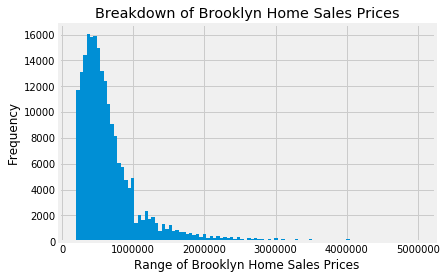

In [34]:
#Here is a histogram for sale_price
#This helps with checking the distribution of data and this is definitely skewed right

brooklyn.loc[:,"sale_price"].plot(kind='hist', bins=100)
plt.xlabel("Range of Brooklyn Home Sales Prices")
plt.title("Breakdown of Brooklyn Home Sales Prices");

In [35]:
#It looks like the data still has some outlier on the upper end
#I will reduce the maximum price to $2 million now

brooklyn = brooklyn[brooklyn.sale_price <= 2000000]

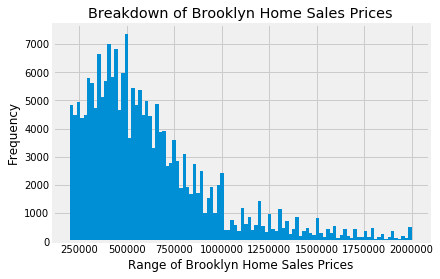

In [36]:
#Here is a historgram for sale_price
#This looks better, but is still skewed to the right

brooklyn.loc[:,"sale_price"].plot(kind='hist', bins=100)
plt.xlabel("Range of Brooklyn Home Sales Prices")
plt.title("Breakdown of Brooklyn Home Sales Prices");

In [37]:
brooklyn = brooklyn[brooklyn.sale_price <= 1000000]

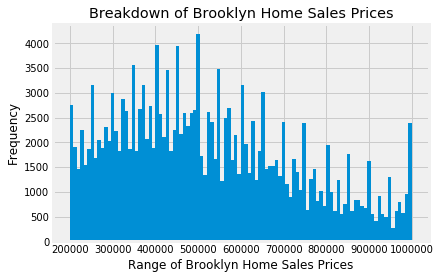

In [38]:
#This looks more closely to a normal distribution
#I am going to stick with this for now

brooklyn.loc[:,"sale_price"].plot(kind='hist', bins=100)
plt.xlabel("Range of Brooklyn Home Sales Prices")
plt.title("Breakdown of Brooklyn Home Sales Prices");

# Second Pass Model

Let's see how much cleaning up of the sales price data has affected my model

In [39]:
#I am only using numeric data for the first-pass model as a matter of simplicity

#I do believe there are categorical variables that will be useful as explanatory variables in an improved model

brooklyn_numeric2 = brooklyn[['sale_price', 'residential_units', 'commercial_units', 'total_units', 'land_sqft', 
                              'gross_sqft', 'HealthArea', 'LotArea', 'BldgArea', 'ComArea', 'ResArea', 'OfficeArea',
                             'RetailArea', 'GarageArea', 'StrgeArea', 'FactryArea', 'OtherArea', 'NumBldgs',
                             'NumFloors', 'LotFront', 'LotDepth', 'BldgFront', 'BldgDepth', 'AssessLand', 
                             'AssessTot', 'ExemptLand', 'ExemptTot']].dropna()

In [40]:
#Separating the variables between X and y

X = brooklyn_numeric2.drop('sale_price', axis='columns')
y = brooklyn_numeric2.loc[:, 'sale_price']

In [41]:
#Setting up a training set and a test set
#test_size = .2 means 20% of the data is set aside for the test set. 80% of the data is used for the training set
#You could also use train_size if you wish

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=30)

In [42]:
#Setting up a linear regression model using the training set

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [43]:
#Scoring the model on the training set and test set.
#These are the R-squared values for the training set and test set. 

print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.08070982627600498
0.012613320082916601


#### First Impressions

The model is basically worse than the first go around. The training model captured 8% of the variance and the test model captured 1%. 

# Even More Data Cleaning

#### Converting Numeric Data Types into Strings

Many variables in the dataset are incorrectly formatted as integers or floats when they are actually strings. They are categorical variables.

In [44]:
brooklyn = brooklyn.astype({'zip_code':str, 'year_of_sale':str, 'tax_class_at_sale':str, 'YearAlter1':str,
                            'HealthCent':str, 'YearAlter2':str, 'AreaSource':str,'BsmtCode':str, 'year_built':str, 
                            'ProxCode':str, 'LandUse':str,  'TaxMap':str, 'LotType':str})

In [45]:
#Here I am double checking that all variables are formatted correctly

brooklyn.dtypes

zip_code                   object
residential_units           int64
commercial_units            int64
total_units                 int64
land_sqft                 float64
gross_sqft                float64
year_built                 object
tax_class_at_sale          object
building_class_at_sale     object
sale_price                float64
year_of_sale               object
HealthCent                 object
HealthArea                float64
SanitSub                   object
SplitZone                  object
LandUse                    object
OwnerName                  object
LotArea                   float64
BldgArea                  float64
ComArea                   float64
ResArea                   float64
OfficeArea                float64
RetailArea                float64
GarageArea                float64
StrgeArea                 float64
FactryArea                float64
OtherArea                 float64
AreaSource                 object
NumBldgs                  float64
NumFloors     

#### What data does a zip code encompass?

In [46]:
brooklyn['zip_code'].value_counts() 

11234    10194
11201     8810
11235     8029
11221     7883
11207     7883
11208     7771
11236     7311
11215     7257
11233     6351
11229     6243
11211     5908
11238     5872
11209     5656
11214     5602
11218     5247
11203     4909
11220     4675
11223     4575
11205     4573
11204     4452
11216     4299
11206     4117
11230     4062
11219     4031
11228     3687
11210     3612
11217     3395
11226     3325
11212     3021
11213     2970
11222     2744
11237     2584
11231     2460
11224     2353
11225     1932
11232     1758
11249      804
11239      325
0          136
11243       37
11416       13
11258        1
Name: zip_code, dtype: int64

In [47]:
#I am going to drop all rows where the zip code is "0"

brooklyn = brooklyn[brooklyn.zip_code != '0']

In [48]:
brooklyn['zip_code'].value_counts() 

11234    10194
11201     8810
11235     8029
11207     7883
11221     7883
11208     7771
11236     7311
11215     7257
11233     6351
11229     6243
11211     5908
11238     5872
11209     5656
11214     5602
11218     5247
11203     4909
11220     4675
11223     4575
11205     4573
11204     4452
11216     4299
11206     4117
11230     4062
11219     4031
11228     3687
11210     3612
11217     3395
11226     3325
11212     3021
11213     2970
11222     2744
11237     2584
11231     2460
11224     2353
11225     1932
11232     1758
11249      804
11239      325
11243       37
11416       13
11258        1
Name: zip_code, dtype: int64

Here are the actual zip codes for Brooklyn

Central Brooklyn: 11212, 11213, 11216, 11233, 11238
    
Southwest Brooklyn: 11209, 11214, 11228
    
Borough Park: 11204, 11218, 11219, 11230
    
Canarsie and Flatlands: 11234, 11236, 11239
    
Southern Brooklyn: 11223, 11224, 11229, 11235
    
Northwest Brooklyn: 11201, 11205, 11215, 11217, 11231
    
Flatbush: 11203, 11210, 11225, 11226
    
East New York and New Lots: 11207, 11208
    
Greenpoint: 11211, 11222
    
Sunset Park: 11220, 11232
    
Bushwick and Williamsburg: 11206, 11221, 11237

In [49]:
#The lowest zip code is 11201 so I am going to drop all below it

brooklyn = brooklyn[brooklyn.zip_code != '11200']

In [50]:
#The highest zip code is 11239 so I am going to drop all above it

brooklyn = brooklyn[brooklyn.zip_code != '11249']

In [51]:
#The highest zip code is 11239 so I am going to drop all above it

brooklyn = brooklyn[brooklyn.zip_code != '11243']

In [52]:
#The highest zip code is 11239 so I am going to drop all above it

brooklyn = brooklyn[brooklyn.zip_code != '11416']

In [53]:
#The highest zip code is 11239 so I am going to drop all above it

brooklyn = brooklyn[brooklyn.zip_code != '11258']

In [54]:
brooklyn['zip_code'].value_counts() 

11234    10194
11201     8810
11235     8029
11221     7883
11207     7883
11208     7771
11236     7311
11215     7257
11233     6351
11229     6243
11211     5908
11238     5872
11209     5656
11214     5602
11218     5247
11203     4909
11220     4675
11223     4575
11205     4573
11204     4452
11216     4299
11206     4117
11230     4062
11219     4031
11228     3687
11210     3612
11217     3395
11226     3325
11212     3021
11213     2970
11222     2744
11237     2584
11231     2460
11224     2353
11225     1932
11232     1758
11239      325
Name: zip_code, dtype: int64

# In-Depth Data Visualization

#### Filling in Missing Values

In [55]:
#Before I visualize the data I am going to fill in any missing values
#Or simply drop if there are more than 100,000+ null values

brooklyn.isna().sum()

zip_code                      0
residential_units             0
commercial_units              0
total_units                   0
land_sqft                     0
gross_sqft                    0
year_built                    0
tax_class_at_sale             0
building_class_at_sale        0
sale_price                    0
year_of_sale                  0
HealthCent                    0
HealthArea                42730
SanitSub                  42867
SplitZone                 42739
LandUse                       0
OwnerName                 42751
LotArea                   42730
BldgArea                  42730
ComArea                   42730
ResArea                   42730
OfficeArea                42730
RetailArea                42730
GarageArea                42730
StrgeArea                 42730
FactryArea                42730
OtherArea                 42730
AreaSource                    0
NumBldgs                  42730
NumFloors                 42730
LotFront                  42730
LotDepth

In [56]:
brooklyn['HealthArea'] = brooklyn['HealthArea'].fillna(brooklyn['HealthArea'].median())

In [57]:
brooklyn['SanitSub'] = brooklyn['SanitSub'].fillna(brooklyn['SanitSub'].mode()[0])

In [58]:
brooklyn['SplitZone'] = brooklyn['SplitZone'].fillna(brooklyn['SplitZone'].mode()[0])

In [59]:
brooklyn['OwnerName'] = brooklyn['OwnerName'].fillna(brooklyn['OwnerName'].mode()[0])

In [60]:
brooklyn['LotArea'] = brooklyn['LotArea'].fillna(brooklyn['LotArea'].median())

In [61]:
brooklyn['BldgArea'] = brooklyn['BldgArea'].fillna(brooklyn['BldgArea'].median())

In [62]:
brooklyn['ResArea'] = brooklyn['ResArea'].fillna(brooklyn['ResArea'].median())

In [63]:
brooklyn['RetailArea'] = brooklyn['RetailArea'].fillna(brooklyn['RetailArea'].median())

In [64]:
brooklyn['NumFloors'] = brooklyn['NumFloors'].fillna(brooklyn['NumFloors'].median())

In [65]:
brooklyn['LotFront'] = brooklyn['LotFront'].fillna(brooklyn['LotFront'].median())

In [66]:
brooklyn['LotDepth'] = brooklyn['LotDepth'].fillna(brooklyn['LotDepth'].median())

In [67]:
brooklyn['BldgFront'] = brooklyn['BldgFront'].fillna(brooklyn['BldgFront'].median())

In [68]:
brooklyn['IrrLotCode'] = brooklyn['IrrLotCode'].fillna(brooklyn['IrrLotCode'].mode()[0])

In [69]:
brooklyn['AssessLand'] = brooklyn['AssessLand'].fillna(brooklyn['AssessLand'].median())

In [70]:
brooklyn['AssessTot'] = brooklyn['AssessTot'].fillna(brooklyn['AssessTot'].median())

In [71]:
brooklyn['ExemptLand'] = brooklyn['ExemptLand'].fillna(brooklyn['ExemptLand'].median())

In [72]:
brooklyn['ZoneMap'] = brooklyn['ZoneMap'].fillna(brooklyn['ZoneMap'].mode()[0])

In [73]:
brooklyn['ComArea'] = brooklyn['ComArea'].fillna(brooklyn['ComArea'].median())

In [74]:
brooklyn['OfficeArea'] = brooklyn['OfficeArea'].fillna(brooklyn['OfficeArea'].median())

In [75]:
brooklyn['GarageArea'] = brooklyn['GarageArea'].fillna(brooklyn['GarageArea'].median())

In [76]:
brooklyn['StrgeArea'] = brooklyn['StrgeArea'].fillna(brooklyn['StrgeArea'].median())

In [77]:
brooklyn['FactryArea'] = brooklyn['FactryArea'].fillna(brooklyn['FactryArea'].median())

In [78]:
brooklyn['OtherArea'] = brooklyn['OtherArea'].fillna(brooklyn['OtherArea'].median())

In [79]:
brooklyn['NumBldgs'] = brooklyn['NumBldgs'].fillna(brooklyn['NumBldgs'].median())

In [80]:
brooklyn['BldgDepth'] = brooklyn['BldgDepth'].fillna(brooklyn['BldgDepth'].median())

In [81]:
brooklyn['ExemptTot'] = brooklyn['ExemptTot'].fillna(brooklyn['ExemptTot'].median())

In [82]:
#Here I am just checking that I filled in the values correctly
#There are no longer any null values

brooklyn.isna().sum()

zip_code                  0
residential_units         0
commercial_units          0
total_units               0
land_sqft                 0
gross_sqft                0
year_built                0
tax_class_at_sale         0
building_class_at_sale    0
sale_price                0
year_of_sale              0
HealthCent                0
HealthArea                0
SanitSub                  0
SplitZone                 0
LandUse                   0
OwnerName                 0
LotArea                   0
BldgArea                  0
ComArea                   0
ResArea                   0
OfficeArea                0
RetailArea                0
GarageArea                0
StrgeArea                 0
FactryArea                0
OtherArea                 0
AreaSource                0
NumBldgs                  0
NumFloors                 0
LotFront                  0
LotDepth                  0
BldgFront                 0
BldgDepth                 0
ProxCode                  0
IrrLotCode          

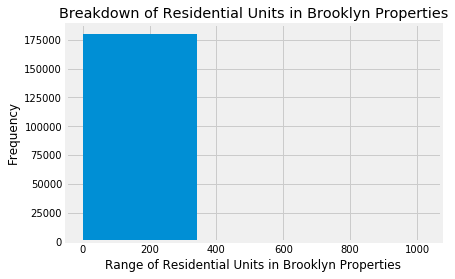

In [92]:
#Here is a histogram for residential_units

brooklyn.loc[:,"residential_units"].plot(kind='hist', bins=3)
plt.xlabel("Range of Residential Units in Brooklyn Properties")
plt.title("Breakdown of Residential Units in Brooklyn Properties");

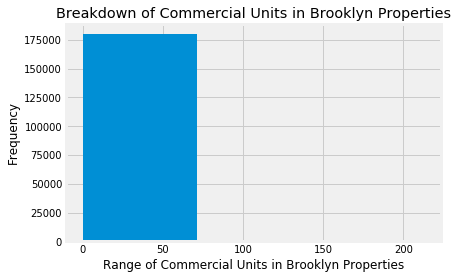

In [91]:
#Here is a histogram for commercial_units

brooklyn.loc[:,"commercial_units"].plot(kind='hist', bins=3)
plt.xlabel("Range of Commercial Units in Brooklyn Properties")
plt.title("Breakdown of Commercial Units in Brooklyn Properties");

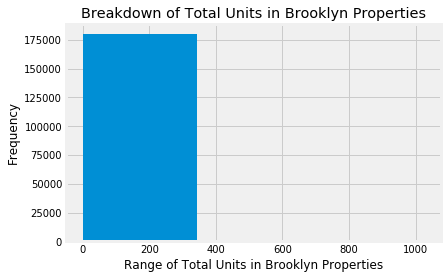

In [90]:
#Here is a histogram for total_units

brooklyn.loc[:,"total_units"].plot(kind='hist', bins=3)
plt.xlabel("Range of Total Units in Brooklyn Properties")
plt.title("Breakdown of Total Units in Brooklyn Properties");

# Converting Strings Into Dummy Variables

In [84]:
brooklyn_new = brooklyn[['sale_price', 'zip_code', 'residential_units', 'commercial_units', 'total_units', 'land_sqft',
                        'gross_sqft', 'year_built', 'tax_class_at_sale', 'building_class_at_sale', 'year_of_sale',
                        'HealthArea', 'LotArea', 'BldgArea', 'ResArea', 'RetailArea', 'NumFloors', 'LotFront',
                        'LotDepth', 'BldgFront', 'AssessLand', 'AssessTot', 'ExemptLand']]

In [85]:
#Here I am officially converting the categorical variables into dummy variables


brooklyn_new = pd.get_dummies(brooklyn_new, columns=['zip_code', 'year_built', 'tax_class_at_sale', 'building_class_at_sale', 
                                                     'year_of_sale'], drop_first=True)

In [86]:
brooklyn_new.corr().loc[:, 'sale_price'].sort_values(ascending=False)

sale_price                   1.000000
year_of_sale_2017            0.155257
year_of_sale_2016            0.127658
building_class_at_sale_C1    0.119826
tax_class_at_sale_4          0.112540
year_of_sale_2015            0.110985
zip_code_11215               0.107054
land_sqft                    0.097463
zip_code_11231               0.096332
zip_code_11217               0.086685
gross_sqft                   0.085187
total_units                  0.068150
year_built_1931              0.068046
zip_code_11211               0.066967
year_built_1900              0.064029
year_of_sale_2014            0.063808
commercial_units             0.060856
year_built_1916              0.059924
residential_units            0.059613
year_built_1899              0.057675
building_class_at_sale_A3    0.056775
building_class_at_sale_C0    0.052870
building_class_at_sale_C7    0.051828
building_class_at_sale_C3    0.050886
year_built_2015              0.049950
RetailArea                   0.044604
zip_code_112

In [87]:
brooklyn_numeric = brooklyn_new.select_dtypes(['int64', 'float64'])

In [88]:
brooklyn_numeric.corr().loc[:, 'sale_price'].sort_values(ascending=False)

sale_price           1.000000
land_sqft            0.097463
gross_sqft           0.085187
total_units          0.068150
commercial_units     0.060856
residential_units    0.059613
RetailArea           0.044604
NumFloors           -0.043408
AssessLand          -0.049380
LotFront            -0.063834
LotDepth            -0.068154
BldgFront           -0.070429
LotArea             -0.074401
AssessTot           -0.075480
HealthArea          -0.081304
ExemptLand          -0.083970
BldgArea            -0.088104
ResArea             -0.092298
Name: sale_price, dtype: float64

In [89]:
brooklyn_new = brooklyn.drop(['RetailArea','NumFloors','AssessLand'], axis = 'columns')

# Checking for Collinearity

In [90]:
brooklyn_numeric = brooklyn_new.select_dtypes(['int64', 'float64'])

In [92]:
#Here I am creating a subset of the brooklyn dataset in order to test collinearity
#The sns heatmap will only accept a certain amount of inputs

bkn_1 = brooklyn_numeric.iloc[:, 0:8]

In [93]:
#Here I am creating a subset of the brooklyn dataset in order to test collinearity
#The sns heatmap will only accept a certain amount of inputs

bkn_2 = brooklyn_numeric.iloc[:, 8:15]

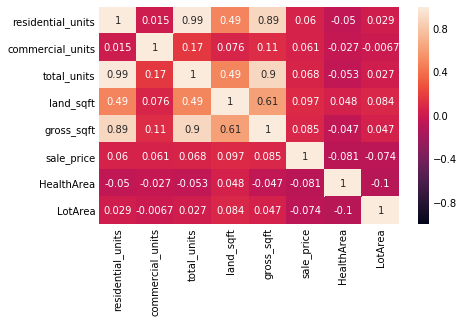

In [94]:
ax = sns.heatmap(bkn_1.corr(), vmin = -1, vmax = 1, annot=True)

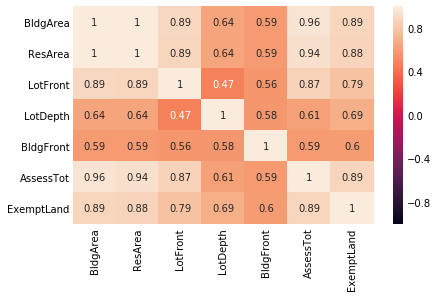

In [95]:
ax = sns.heatmap(bkn_2.corr(), vmin = -1, vmax = 1, annot=True)